# Data types, operators. Control flow.

## Built-in data types

### Integers

https://docs.python.org/3/library/stdtypes.html#typesnumeric

The int data type has unlimited precision

In [1]:
import sys
# Platform-specific maximum value for integers
print("Max Int:", sys.maxsize, "or ", hex(sys.maxsize))  
# Platform-specific minimum value for integers
print("Min Int:", -sys.maxsize - 1)  

Max Int: 9223372036854775807 or  0x7fffffffffffffff
Min Int: -9223372036854775808


In [2]:
# but:
a =  sys.maxsize
b = a * 2
print(b)

18446744073709551614


#### Problem:

What are the advantages and disadvantages of storing numbers in such a uniform format?


In [3]:
# "The current implementation keeps an array of integer objects for all integers between -5 and 256. 
# When you create an int in that range you actually just get back a reference to the existing object."

a = 256
b = 256
print(id(a) == id(b))
a = 257
b = 257
print(id(a) == id(b))

True
False


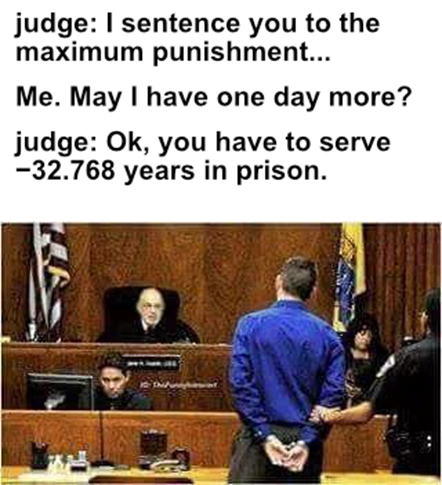

Example from C (https://www.onlinegdb.com/online_c++_compiler):

```c
#include<stdio.h>

int main()
{
    signed int c = 0x7FFFFFFF; //0xFFFFFFFF;
    printf("c is %i\n", c);
    printf("c+1 is %i\n", c+1);
    printf("c*2 is %i\n", c*2);
    
    unsigned int d = 0xFFFFFFFF;
    printf("d is %u\n", d);
    printf("d+1 is %u\n", d+1);
    printf("d*2 is %u\n", d*2);
    return 0;
}
```

gives

    c is 2147483647
    c+1 is -2147483648
    c*2 is -2
    d is 4294967295
    d+1 is 0
    d*2 is 4294967294

### Floats

Python uses the IEEE 754 double-precision format (64 bits) to represent floating-point numbers.

Limits:

In [2]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [4]:
sys.float_info.max

1.7976931348623157e+308

In [4]:
float.hex(sys.float_info.max)

'0x1.fffffffffffffp+1023'

In [7]:
infinity = float("inf")
print(infinity)
print(infinity / 10000)

inf
inf


In [1]:
this_is_a_float = float('NaN')
print(this_is_a_float)

nan


### Strings

a string's length is limited by the system's memory.


Examples of declaration:

In [1]:
print('This is a string.')
print("And so is this.")
print('''String in several lines:
        one,
        two, 
        three''')

print("""and even 
this...""")

This is a string.
And so is this.
String in several lines:
        one,
        two, 
        three
and even 
this...


### class "str"
* Immutable, iterable
* primary data type
* usually UTF-8
* Different from strings in other languages (e.g. C strings) (ASCII \0-terminated), C++ class string)

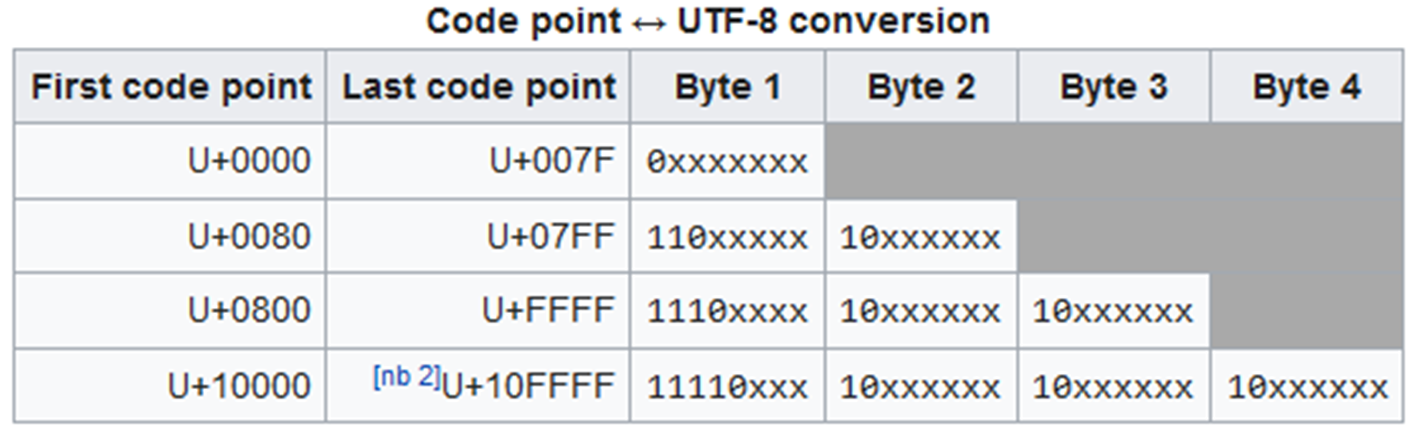

String operators (+, -, *, [ ] , in, not in, \ )

String methods (isalpha, isdigit, isdecimal, isalnum, islower, isupper, lower, upper, lstrip, rstrip, strip, capitalize, casefold, count, find, rfind, encode, endswith, expandtabs)

String functions: join(iterable) , partition(sep) , split(sep=None, maxsplit=-1)




strip() removes all service characters at the beginning and end of the string (\n, \t, \r).  
split(',’) cuts the strings by the required characters.  
' '.join(list) combines a list of strings into one string.  
Example for the case of combining numbers into a string:  
' '.join(str(e) for e in list)

In [9]:
s = '\t 123 543,  asdf, ljkh, \r\n'
s1 = s.strip()
print(s1)
s2 = s1.split(',')
print(s2)
str = ' '.join(s2)
print(str)

123 543,  asdf, ljkh,
['123 543', '  asdf', ' ljkh', '']
123 543   asdf  ljkh 


#### Raw strings

escape character disabled

In [2]:
common_str = 'C:\file.txt'
raw_str = r'C:\file.txt'
print('common_str=', common_str) 
print('raw_str=', raw_str)

common_str= C:ile.txt
raw_str= C:\file.txt


#### f-strings 

Formatted string literals

(a literal is a textual representation (notation) of a value as it is written in source code)

In [4]:
a = 4.5678 
print(f'Demo {a/2}') 
print(f'{a=}')

Demo 2.2839
a=4.5678


#### Problem

Calculating the return on a deposit

P is the initial deposit,  
r is the interest rate,  
n is the number of years  

A is the final amount.

Let's P = 100, r = 5.0, и n = 7

<div style="text-align: left">
    $A = P(1+(r/100))^n$
</div>


Possible solutions:

In [2]:
# No 1
print(100*(1 + 5.0/100)**7)

140.71004226562505


In [3]:
# No 2
primary = 100
r = 5.0
n = 7
amount = primary * (1+r/100)**n
print(amount)

140.71004226562505


In [4]:
# No 3
initial_amount = 100
interest_rate = 5.0
number_of_years = 7
final_amount = initial_amount*(1 + interest_rate/100)**number_of_years
print(final_amount)

140.71004226562505


Which of these results looks better?

How can it be improved using f-strings?

In [5]:
primary = 100
r = 5.0
n = 7
amount = primary * (1+r/100)**n
print(f"After {n} years, 100 EUR has grown to {amount} EUR.")

After 7 years, 100 EUR has grown to 140.71004226562505 EUR.


What would you like to improve?

### Formatted output for float/int

Types for float and int:
* g - default general e/f format (6 digits), .n - number of significant digits
* e - scientific notation, .n - number of decimal places
* f - floating point, .n - number of decimal places
* d - integer decimal
* % - percent (float * 100 + "%")

In [6]:
print(f"After {n} years, 100 EUR has grown to {amount:.2} EUR.") 
print(f"After {n} years, 100 EUR has grown to {amount:.2f} EUR.") 
print(f"After {n} years, 100 EUR has grown to {amount:.2e} EUR.") 
print(f"After {n} years, 100 EUR has grown to {amount:.2g} EUR.")

After 7 years, 100 EUR has grown to 1.4e+02 EUR.
After 7 years, 100 EUR has grown to 140.71 EUR.
After 7 years, 100 EUR has grown to 1.41e+02 EUR.
After 7 years, 100 EUR has grown to 1.4e+02 EUR.


Another examples:

In [7]:
t = 1.234567
print(f"We can set the precision: t = {t:.2}.")
print(f"Or control the number of decimals: t = {t:.2f}.")

We can set the precision: t = 1.2.
Or control the number of decimals: t = 1.23.


In [8]:
a = 786345687.12
b = 1.2345
print(f"a = {a:g}, b = {b:g}.")
print(f"a = {a:e}, b = {b:e}.")
print(f"a = {a:f}, b = {b:f}.")

a = 7.86346e+08, b = 1.2345.
a = 7.863457e+08, b = 1.234500e+00.
a = 786345687.120000, b = 1.234500.


#### Tabulated table

The width of the output field is specified immediately after the colon, before the period - :8.2f

In [19]:
t = 71.2345
for i in range(10):
    print(f"We may set the space used for the output: t = {i*i*t:8.2f}.")

We may set the space used for the output: t =     0.00.
We may set the space used for the output: t =    71.23.
We may set the space used for the output: t =   284.94.
We may set the space used for the output: t =   641.11.
We may set the space used for the output: t =  1139.75.
We may set the space used for the output: t =  1780.86.
We may set the space used for the output: t =  2564.44.
We may set the space used for the output: t =  3490.49.
We may set the space used for the output: t =  4559.01.
We may set the space used for the output: t =  5769.99.


In [4]:
r = 5987
for i in range(10):
    print(f"Integer set to occupy exactly 8 chars of space: r = {i*i*r:8d}")

Integer set to occupy exactly 8 chars of space: r =        0
Integer set to occupy exactly 8 chars of space: r =     5987
Integer set to occupy exactly 8 chars of space: r =    23948
Integer set to occupy exactly 8 chars of space: r =    53883
Integer set to occupy exactly 8 chars of space: r =    95792
Integer set to occupy exactly 8 chars of space: r =   149675
Integer set to occupy exactly 8 chars of space: r =   215532
Integer set to occupy exactly 8 chars of space: r =   293363
Integer set to occupy exactly 8 chars of space: r =   383168
Integer set to occupy exactly 8 chars of space: r =   484947


### Rounding for float/int

* Mathematical rounding to the nearest integer. 
* Fractional part truncation - int(), math.trunc()
* Rounding to the nearest even (banker's rounding) - round()
* Rounding up and down - math.ceil()/math.floor()
* Rounding control for float


|            | 2.5 | 3.5 | -2.5 |
|------------|-----|-----|------|
| int        | 2   | 3   | -2   |
| round      | 2   | 4   | -2   |
| math.floor | 2   | 3   | -3   |
| math.ceil  | 3   | 4   | -3   |
| math.trunc | 2   | 3   | -2   |¶

In [9]:
print(int(2.5))
print(int(3.5))
print(int(-2.5))

2
3
-2


```python
 round(number, ndigits=None)
```
Return number rounded to ndigits precision after the decimal point. If ndigits is omitted or is None, it returns the nearest integer to its input.

In [2]:
print(round(2.5))
print(round(3.5))
print(round(-2.5))

2
4
-2


In [7]:
import math

print(math.floor(2.5))
print(math.floor(3.5))
print(math.floor(-2.5))

2
3
-3


In [8]:
import math

print(math.ceil(2.5))
print(math.ceil(3.5))
print(math.ceil(-2.5))

3
4
-2


In [3]:
import math

print(math.trunc(2.5))
print(math.trunc(3.5))
print(math.trunc(-2.5))

2
3
-2


In [4]:
# Rounding control

print(round(107.656, 1))
print(round(107.656, -1))

107.7
110.0


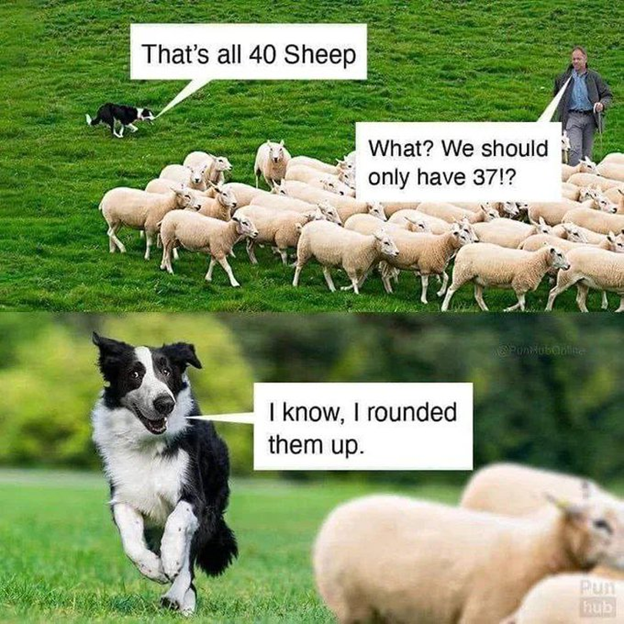

### Rounding accuracy, significant digits

How to find out the number of significant digits?

By taking logarithms - log10(abs(x)), math.floor и round(x, n)

In [11]:
import math
print(math.log10(123))

2.089905111439398


How to set the number of significant digits?

In [18]:
import math

value = 2342.343
signif = 5

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1))
    
print(round_to_n(value, signif))

2342.3


Now let's take zero into account:

In [19]:
import math

value = 2342.343
signif = 5

def round_to_n(x, n):
    return x if x == 0 else round(x, -int(math.floor(math.log10(abs(x)))) + (n - 1))
    
print(round_to_n(value, signif))

2342.3


### Errors due to binary representation of data in a computer

In [21]:
print(round(0.074, 2))
print(round(0.075, 2))
print(round(0.076, 2))

0.07
0.07
0.08


In [22]:
0.075.hex()

'0x1.3333333333333p-4'

In [23]:
0x13333333333333 / 16**13 * 2**-4 

0.075

In [24]:
from decimal import Decimal 
Decimal(0x13333333333333) / 16 ** 13 / 2 ** 4 

Decimal('0.07499999999999999722444243844')

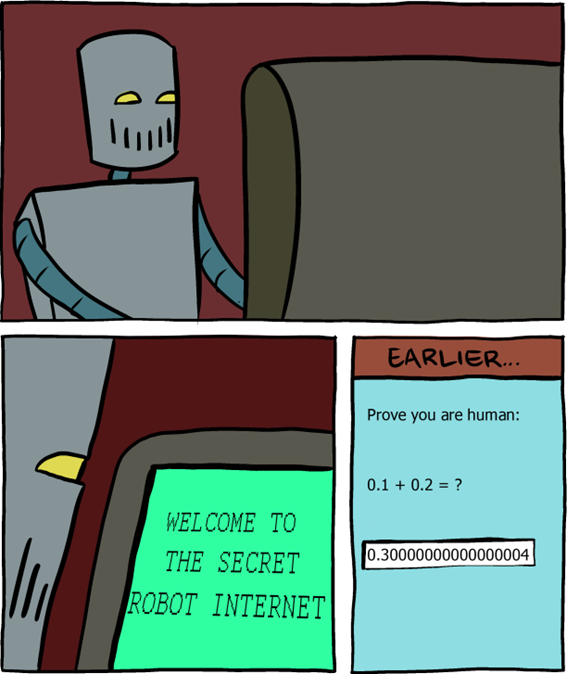

#### Accurate decimal calculations. Decimal 

In [28]:
0.1+0.2

0.30000000000000004

In [26]:
from decimal import Decimal 
Decimal(0.1) + Decimal(0.2)

Decimal('0.3000000000000000166533453694')

In [27]:
Decimal('0.1') + Decimal('0.2')

Decimal('0.3')

In [14]:
# dont work but do not know why...
# first sum must give a "Decimal("369.39")"

from decimal import Decimal 

dec_numbers = ['123.12', '123.12', '123.12']
numbers = []
for i in dec_numbers:
    numbers.append(Decimal(i))
print(numbers)
print(sum(numbers))

print('Decimal: ', sum(numbers))

numbers1 = []
for i in dec_numbers:
    numbers1.append(float(i))

print('Numbers: ', sum(numbers1))

[Decimal('123.12'), Decimal('123.12'), Decimal('123.12')]
369.36
Decimal:  369.36
Numbers:  369.36


#### Byte strings

Byte strings are based on the ASCII encoding. 1 character - 1 byte.

In memory, strings of any encoding are stored in byte format, so recoding is based on the fact that a string in one encoding is converted into a byte string, which is then converted into another encoding.

https://pyprog.pro/python/py/str/str.html

In [7]:
key = bytes([0x13, 0x00, 0x00, 0x00, 0x08, 0x00])
print(key)

b'\x13\x00\x00\x00\x08\x00'


Converting a byte string to a number (for two options for storing numbers in bytes)

In [10]:
# Bytes -> int: 
int1 = int.from_bytes(key, 'little') 
print(int1)
int2 = int.from_bytes(key, 'big') 
print(int2)

34359738387
20890720929792


Converting a byte string to a regular string (specifying the original encoding):

In [21]:
# Bytes -> string:
word = b'\xcd\xc9\xd2'
str1 = word.decode('koi8_r') 
print(str1)
str2 = word.decode("CP1251") 
print(str2)

мир
НЙТ


A string in any encoding is stored in byte format.   
For example, a string in UTF-8 format is stored as follows: ASCII-7 characters (code up to 128) are represented "as is" according to the principle 1 byte 1 character. Characters of the senior part of the code table (code > 128), where Cyrillic characters are located, are represented by 16-bit (two-byte) codes of the form "110XXXXX 10XXXXXX".

In [4]:
str0 = "example"
byte_str0 = str0.encode()
print(byte_str0)

str1 = "пример"
byte_str1 = str1.encode()
print(byte_str1)

str3 = "п"
byte_str3 = str3.encode()
print(byte_str3)

str2 = "例子"
byte_str2 = str2.encode()
print(byte_str2)


str4 = "例"
byte_str4 = str4.encode()
print(byte_str4)

b'example'
b'\xd0\xbf\xd1\x80\xd0\xb8\xd0\xbc\xd0\xb5\xd1\x80'
b'\xd0\xbf'
b'\xe4\xbe\x8b\xe5\xad\x90'
b'\xe4\xbe\x8b'


### Question: 

what does "\xd0" or "\x8b" mean?

In case of another encoding the output will be different, because encoding into bytes is carried out according to a different principle.   

For example, the Win-1251 encoding, where the upper part of the table (>127) stores the cyrillic alphabet:

In [8]:
str0 = "example"
byte_str0 = str0.encode('utf16')
print(byte_str0)

str2 = "пример"
byte_str2 = str2.encode('utf16')
print(byte_str2)

str3 = "例子"
byte_str3 = str3.encode('utf16')
print(byte_str3)

b'\xff\xfee\x00x\x00a\x00m\x00p\x00l\x00e\x00'
b'\xff\xfe?\x04@\x048\x04<\x045\x04@\x04'
b'\xff\xfe\x8bOP['


Return an integer representing the Unicode code point of that character.

In [10]:
print(ord(b'\xe6'))
print(ord('\xe6'))
print(ord('b'))
print(ord('п'))
print(ord('子'))

230
230
98
1087
23376


The Cyrillic character "п" has byte encoding b'\xd0\xbf', the Chinese character "子" has byte encoding b'\xe5\xad\x90', and they can be obtained by decoding:

In [11]:
symbol = b'\xd0\xbf'
symbol = symbol.decode() 
print(symbol)

symbol = b'\xe5\xad\x90'
symbol = symbol.decode() 
print(symbol)

п
子


### Problem

What is the result of running the code?

chr(ord('c') - ord('a') + ord('b'))


And this code?

chr(int((ord('a') + ord('c')) / 2))

#### bytearray

Mutable byte string

In [26]:
b = bytearray(b'hello world!')
print(b)
b[0] = 72 # see ASCII table
b[6] = 87
print(b)

bytearray(b'hello world!')
bytearray(b'Hello World!')


### Immutable and mutable types

* Immutable data types : int, float, tuple*, bool, string, bytes
* Mutable data types: lists, byte arrays, sets, and dictionaries.
  
_Immutable object != Hashed object_

## Operators

https://www.w3schools.com/python/python_operators.asp

```python
+ - * / % ** // 
```

## Control flow

Loops:
```python
if
elif 
else
while
```
From a loop:
```python
continue # skips the current iteration and proceeds to the next one
break # exits the loop entirely
```

In [4]:
for i in range(8):
# i = 0
# while i < 10:
    # i += 1
     if i == 3:
         continue
     elif i == 5:
         break
     else:
         print(i)

0
1
2
4


From functions:
```python
pass # does nothing (to create empty blocks)
return  
```

In [2]:
"Do nothing"
def foo():
    pass


def p():
  "Executes both blocks."
  if True:
    print(1)
    pass
  if True:
    print(2)
    pass

def r():
  "Executes only the first block."
  if True:
    print(1)
    return
  if True:
    print(2)
    return False


#### Ternary Conditional Operator
```python
expression1 if condition else expression2
```

In [4]:
a = 3
print('Odd') if a % 2 else print('Even')

Odd


In [11]:
a = 3
print('Odd') if a % 2 else None

Odd


#### Switch-Case Statement 

https://docs-python.ru/tutorial/tsikly-upravlenie-vetvleniem-python/konstruktsija-match-case/

In [3]:
code = 201
match code:
     case 200:
         print("OK")
     case 201:
         print("Problem")
     case _:
         print("No code")

Problem


### Problem

Write a program that takes numbers (0-9) and returns them as text ("one", "two"...).
Check non-digit input.